# Preprocessing

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import necessary packages
from pathlib import Path
import sys
import pandas as pd
from datetime import datetime, timedelta
import re
import numpy as np
import matplotlib.pyplot as plt
import shutil
import hatyan
hatyan.close('all')
from netCDF4 import Dataset
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from tqdm import tqdm
import sys
sys.path.append(r'C:\Users\schijven\OneDrive - Stichting Deltares\Documents\Code\New_classes\Preprocessing\lib')
from preprocessing_new import Preprocessing

In [3]:
tg_path = Path(r"C:\Users\schijven\OneDrive - Stichting Deltares\Documents\Data\Tide_gauges")
eur = "euro_platform-eurpfm-nld-rws"
vlis = "vlissingen-vlissgn-nld-rws"
schev = "scheveningen-schevngn-nld-rws"

output_name = Path(r"C:\Users\schijven\OneDrive - Stichting Deltares\Documents\Data\Tide_gauge_processed")

era5_path = Path(r"C:\Users\schijven\OneDrive - Stichting Deltares\Documents\Data\ERA-5\full")

tg_files = [vlis, schev, eur]
alt_path = Path(r"C:\Users\schijven\OneDrive - Stichting Deltares\Documents\Data\Altimetry_XTRACK_v21")

filename_geoid = Path(r"C:\Users\schijven\OneDrive - Stichting Deltares\Documents\Data\Geoid\EGG2015_20170713.isg")

alt_output_path = Path(r"C:\Users\schijven\OneDrive - Stichting Deltares\Documents\Data\Altimetry_output")

In [ ]:
# get locations of tide gauges
locs = np.zeros((3, 2))
tg_schev = pd.read_csv(tg_path / schev, skiprows=10, nrows=2, delimiter=r'\s+', header=None, usecols=[1,2])
locs[0, 0] = tg_schev[2][1]
locs[0, 1] = tg_schev[2][0]
tg_vlis = pd.read_csv(tg_path / vlis, skiprows=10, nrows=2, delimiter=r'\s+', header=None, usecols=[1,2])
locs[1, 0] = tg_vlis[2][1]
locs[1, 1] = tg_vlis[2][0]
tg_eur = pd.read_csv(tg_path / eur, skiprows=10, nrows=2, delimiter=r'\s+', header=None, usecols=[1,2])
locs[2, 0] = tg_eur[2][1]
locs[2, 1] = tg_eur[2][0]


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
projection_crs = ccrs.Robinson()        # Define projection
fig, ax = plt.subplots(subplot_kw={'projection': projection_crs}, figsize=(7,7))  # Define figure specs
ax.coastlines(resolution="10m")            # Add coastlines
ax.add_feature(cfeature.BORDERS, edgecolor='k')  # Add borders between countries
ax.add_feature(cfeature.OCEAN)             # Add blue ocean
ax.set_extent([-5, 9, 48, 61], crs=ccrs.PlateCarree())   # Define extent of plot
ax.scatter(locs[:,0], locs[:,1], color='k', label="Tide gauge location", transform=ccrs.PlateCarree())
ax.legend()
ax.text(3.2, 52.1, "Europlatform", transform=ccrs.PlateCarree(), ha="right")
ax.text(3.6, 51.5, "Vlissingen", transform=ccrs.PlateCarree(), ha="right")
ax.text(4.3, 51.8, "Scheveningen", transform=ccrs.PlateCarree(), ha="left")
ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, linewidth=1, color='gray', linestyle="dashed", alpha=0.5, x_inline=False)  # Add gridlines and labels
# # ax.scatter(lon_value, lat_value, color='yellow')
# plt.show()

# Plot borders of area of interest
x = [-4, 4]
y = [60, 60]
x1 = [8.5, 4]
y1 = [53.5, 60]
x2 = [-1, 8.5]
y2 = [48.5, 53.5]
x3 = [-1, -4]
y3 = [51, 57]
x4 = [-4, -4]
y4 = [60, 57]
x5 = [-1, -1]
y5 = [51, 48.5]
ijx = [5, 5, 5.5, 5.5, 5]
ijy = [53, 52.5, 52.5, 53, 53]
ax.plot(x, y, color='red', linewidth=2, transform=ccrs.PlateCarree())
ax.plot(ijx, ijy, color='red', linewidth=2, transform=ccrs.PlateCarree())
ax.plot(x1, y1, color='red', linewidth=2, transform=ccrs.PlateCarree())
ax.plot(x2, y2, color='red', linewidth=2, transform=ccrs.PlateCarree())
ax.plot(x3, y3, color='red', linewidth=2, transform=ccrs.PlateCarree())
ax.plot(x4, y4, color='red', linewidth=2, transform=ccrs.PlateCarree())
ax.plot(x5, y5, color='red', linewidth=2, transform=ccrs.PlateCarree())

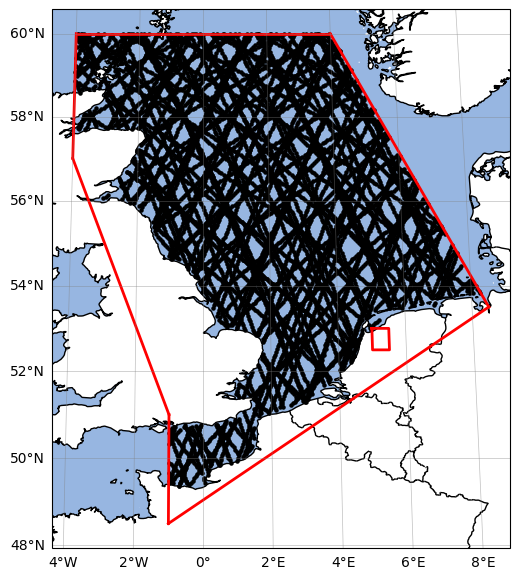

In [6]:
alt = Preprocessing()
alt.alt_preproc(alt_path, tg_files, tg_path, filename_geoid, alt_output_path, show=True, save=True)
alt.alt_plot(alt_path)

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
projection_crs = ccrs.Robinson()        # Define projection
fig, ax = plt.subplots(subplot_kw={'projection': projection_crs}, figsize=(7,7))  # Define figure specs
ax.coastlines(resolution="10m")            # Add coastlines
ax.add_feature(cfeature.BORDERS, edgecolor='k')  # Add borders between countries
ax.add_feature(cfeature.OCEAN)             # Add blue ocean
ax.set_extent([-5, 9, 48, 61], crs=ccrs.PlateCarree())   # Define extent of plot
ax.scatter(locs[:,0], locs[:,1], color='k', label="Tide gauge location", transform=ccrs.PlateCarree())
ax.legend()
ax.text(3.2, 52.1, "Europlatform", transform=ccrs.PlateCarree(), ha="right")
ax.text(3.6, 51.5, "Vlissingen", transform=ccrs.PlateCarree(), ha="right")
ax.text(4.3, 51.8, "Scheveningen", transform=ccrs.PlateCarree(), ha="left")
ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, linewidth=1, color='gray', linestyle="dashed", alpha=0.5, x_inline=False)  # Add gridlines and labels
# # ax.scatter(lon_value, lat_value, color='yellow')
# plt.show()

# Plot borders of area of interest
x = [-4, 4]
y = [60, 60]
x1 = [8.5, 4]
y1 = [53.5, 60]
x2 = [-1, 8.5]
y2 = [48.5, 53.5]
x3 = [-1, -4]
y3 = [51, 57]
x4 = [-4, -4]
y4 = [60, 57]
x5 = [-1, -1]
y5 = [51, 48.5]
ijx = [5, 5, 5.5, 5.5, 5]
ijy = [53, 52.5, 52.5, 53, 53]
ax.plot(x, y, color='red', linewidth=2, transform=ccrs.PlateCarree())
ax.plot(ijx, ijy, color='red', linewidth=2, transform=ccrs.PlateCarree())
ax.plot(x1, y1, color='red', linewidth=2, transform=ccrs.PlateCarree())
ax.plot(x2, y2, color='red', linewidth=2, transform=ccrs.PlateCarree())
ax.plot(x3, y3, color='red', linewidth=2, transform=ccrs.PlateCarree())
ax.plot(x4, y4, color='red', linewidth=2, transform=ccrs.PlateCarree())
ax.plot(x5, y5, color='red', linewidth=2, transform=ccrs.PlateCarree())

In [4]:
alt.alt_data

,Time,MSS,MDT,bias,SLA,SSB,OT,ST,PT,DAC,...,udist_schev,udist_eur,vdist_vlis,vdist_schev,vdist_eur,mission,track,cycle,geoid,DOT
0,1992-10-24 10:48:30.146943,40.042026,0.128858,-0.0114,-0.139066,-0.070266,0.6569,-0.0210,-0.0028,0.3835,...,-373325.873599,-483094.614114,-368840.075361,-295815.587161,-306982.004084,ERS1+ERS2+ENV+SRL,16,15,40.942,-0.655540
1,1992-10-24 10:48:32.107636,39.811626,0.128598,-0.0114,-0.234634,-0.071954,0.6513,-0.0200,-0.0028,0.3899,...,-369521.682750,-479290.423265,-361660.883109,-288636.394908,-299802.811832,ERS1+ERS2+ENV+SRL,16,15,41.016,-1.049108
2,1992-10-24 10:48:33.088105,39.612939,0.128548,-0.0114,-0.204830,-0.074559,0.6453,-0.0200,-0.0028,0.3923,...,-365546.704344,-475315.444860,-354160.441227,-281135.953026,-292302.369949,ERS1+ERS2+ENV+SRL,16,15,41.016,-1.215592
3,1992-10-24 10:48:34.068574,39.458915,0.128556,-0.0114,-0.023478,-0.077967,0.6369,-0.0200,-0.0028,0.3920,...,-361711.775757,-471480.516273,-346895.500149,-273871.011948,-285037.428871,ERS1+ERS2+ENV+SRL,16,15,40.879,-1.051563
4,1992-10-24 10:48:35.049042,39.357355,0.128628,-0.0114,-0.089759,-0.080966,0.6257,-0.0200,-0.0028,0.3913,...,-357918.543171,-467687.283686,-339689.087876,-266664.599675,-277831.016599,ERS1+ERS2+ENV+SRL,16,15,40.879,-1.220103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2564039,2023-01-26 10:45:59.000000,44.696244,0.065552,-0.0523,0.273411,-0.077031,0.9169,-0.0865,0.0060,-0.2208,...,424105.323366,314336.582850,-258281.587662,-185257.099461,-196423.516385,S3A,758,94,45.471,-0.722145
2564040,2023-01-26 10:46:00.000000,44.781540,0.066468,-0.0523,0.253415,-0.074218,1.0233,-0.0866,0.0060,-0.2146,...,427386.053738,317617.313223,-251889.491706,-178865.003505,-190031.420429,S3A,758,94,45.471,-0.650645
2564041,2023-01-26 10:46:01.000000,44.905465,0.067349,-0.0523,0.260745,-0.068761,1.1422,-0.0867,0.0060,-0.2075,...,430659.129289,320890.388774,-245496.729937,-172472.241736,-183638.658660,S3A,758,94,45.588,-0.629290
2564042,2023-01-26 10:46:02.000000,45.034388,0.068210,-0.0523,0.262542,-0.062181,1.2373,-0.0868,0.0060,-0.1995,...,433924.589344,324155.848829,-239103.313202,-166078.825002,-177245.241925,S3A,758,94,45.588,-0.490570


File 1 of 31


100%|██████████| 8784/8784 [00:21<00:00, 406.69it/s]


File 2 of 31


100%|██████████| 8760/8760 [00:20<00:00, 418.03it/s]


File 3 of 31


100%|██████████| 8760/8760 [00:21<00:00, 413.30it/s]


File 4 of 31


100%|██████████| 8760/8760 [00:20<00:00, 417.46it/s]


File 5 of 31


100%|██████████| 8784/8784 [00:20<00:00, 424.50it/s]


File 6 of 31


100%|██████████| 8760/8760 [00:21<00:00, 414.94it/s]


File 7 of 31


100%|██████████| 8760/8760 [00:21<00:00, 414.58it/s]


File 8 of 31


100%|██████████| 8760/8760 [00:21<00:00, 411.63it/s]


File 9 of 31


100%|██████████| 8784/8784 [00:20<00:00, 418.60it/s]


File 10 of 31


100%|██████████| 8760/8760 [00:20<00:00, 427.82it/s]


File 11 of 31


100%|██████████| 8760/8760 [00:20<00:00, 417.81it/s]


File 12 of 31


100%|██████████| 8760/8760 [00:20<00:00, 417.65it/s]


File 13 of 31


100%|██████████| 8784/8784 [00:20<00:00, 419.04it/s]


File 14 of 31


100%|██████████| 8760/8760 [00:22<00:00, 385.12it/s]


File 15 of 31


100%|██████████| 8760/8760 [00:21<00:00, 407.86it/s]


File 16 of 31


100%|██████████| 8760/8760 [00:20<00:00, 433.11it/s]


File 17 of 31


100%|██████████| 8784/8784 [00:20<00:00, 419.52it/s]


File 18 of 31


100%|██████████| 8760/8760 [00:20<00:00, 420.30it/s]


File 19 of 31


100%|██████████| 8760/8760 [00:21<00:00, 413.53it/s]


File 20 of 31


100%|██████████| 8760/8760 [00:21<00:00, 403.44it/s]


File 21 of 31


100%|██████████| 8784/8784 [00:21<00:00, 417.81it/s]


File 22 of 31


100%|██████████| 8760/8760 [00:20<00:00, 418.89it/s]


File 23 of 31


100%|██████████| 8760/8760 [00:21<00:00, 412.06it/s]


File 24 of 31


100%|██████████| 8760/8760 [00:21<00:00, 413.09it/s]


File 25 of 31


100%|██████████| 8784/8784 [00:21<00:00, 404.50it/s]


File 26 of 31


100%|██████████| 8760/8760 [00:20<00:00, 419.20it/s]


File 27 of 31


100%|██████████| 8760/8760 [00:20<00:00, 426.65it/s]


File 28 of 31


100%|██████████| 8760/8760 [00:21<00:00, 414.69it/s]


File 29 of 31


100%|██████████| 8784/8784 [00:21<00:00, 412.59it/s]


File 30 of 31


100%|██████████| 8760/8760 [00:20<00:00, 419.41it/s]


File 31 of 31


100%|██████████| 8760/8760 [00:22<00:00, 394.26it/s]


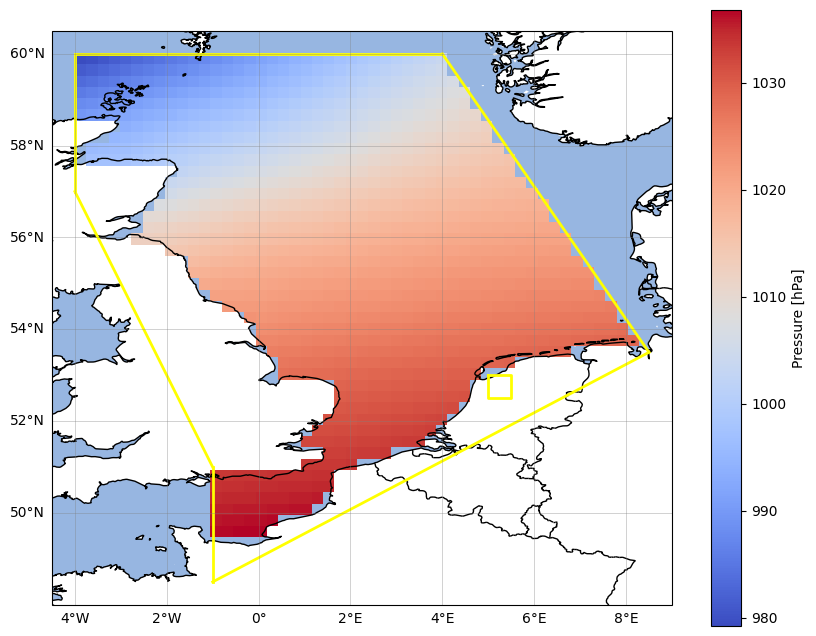

In [6]:
era5 = Preprocessing()
era5.era5_preproc(era5_path, show=True, save=True)

ANALYSIS initializing
source               = schureman
nodalfactors         = True
fu_alltimes          = True
xfac                 = False
CS_comps             = None
analysis_perperiod   = Y
return_allperiods    = True
return_prediction    = False
xTxmat_condition_max = 12

#timesteps           = 233928
tstart               = 1992-01-01 00:00:00
tstop                = 2018-09-07 23:00:00
timestep             = <Hour>
components analyzed  = 95
percentage_nan in values_meas_sel: 0.00%
freq is calculated at mid of period: 2005-05-05 12:00:00
v0 is calculated for start of period: 1992-01-01 00:00:00
nodal factors (f and u) are calculated for all timesteps
folding frequencies over Nyquist frequency, which is half of the dominant timestep (1.0 hour), there are 1 unique timesteps)
Rayleigh criterion OK (always>0.70, minimum is 26.69)
Frequencies are far enough apart (always >0.000003, minimum is 0.000114)
calculating xTx matrix
condition of xTx matrix before center adjustment for A0: 983882

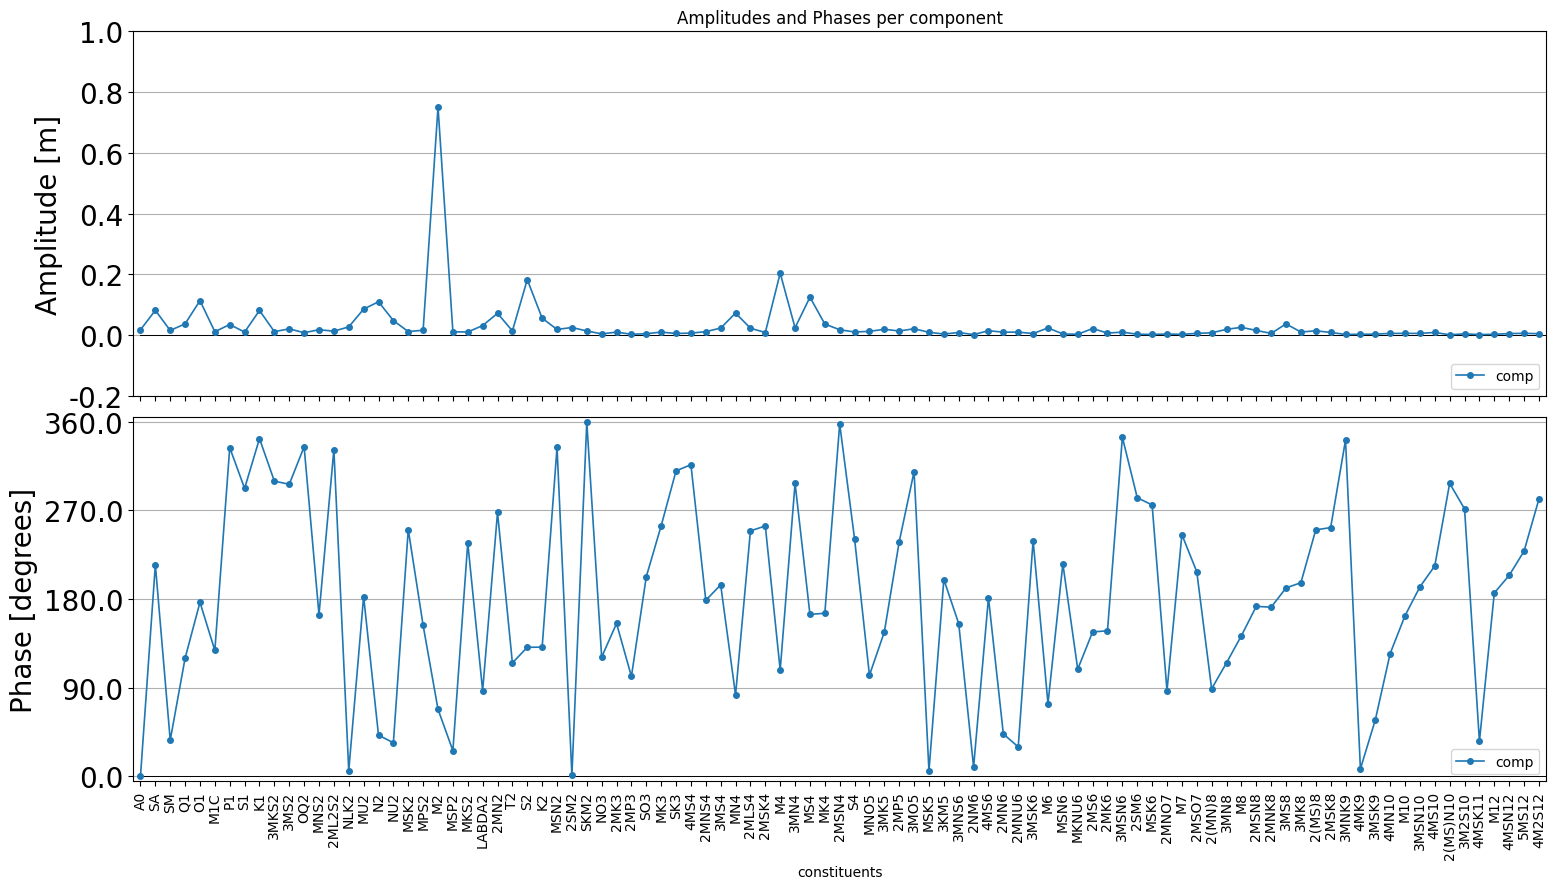

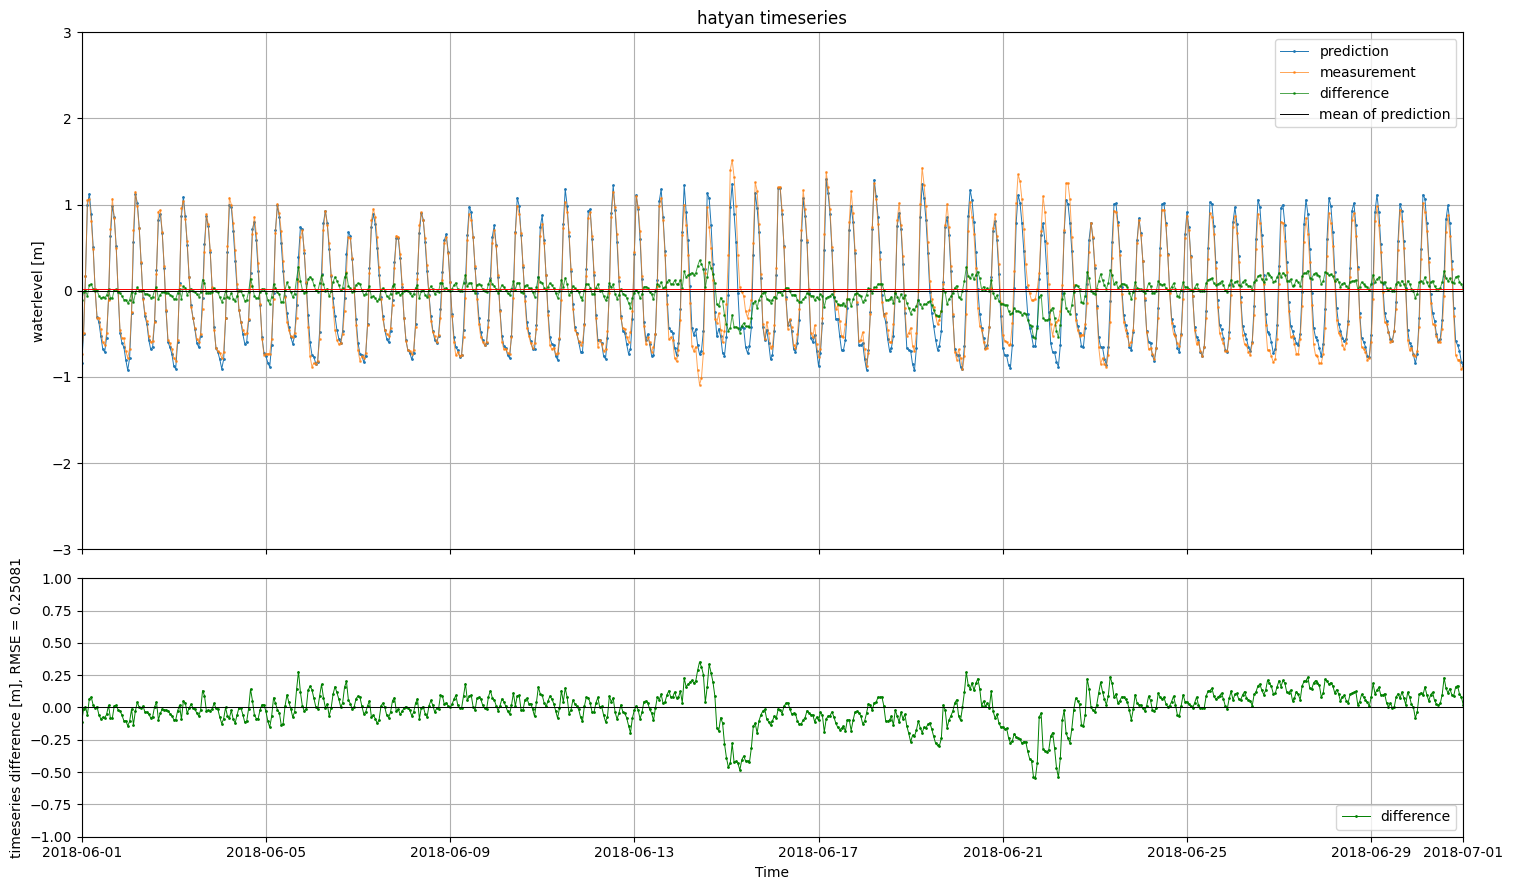

In [29]:
eur_data = Preprocessing()
vlis_data = Preprocessing()
schev_data = Preprocessing()

eur_data.tg_preproc(tg_path, eur, output_name, plot_tidal=True)
vlis_data.tg_preproc(tg_path, vlis, output_name)
schev_data.tg_preproc(tg_path, schev, output_name, plot_tidal=True)

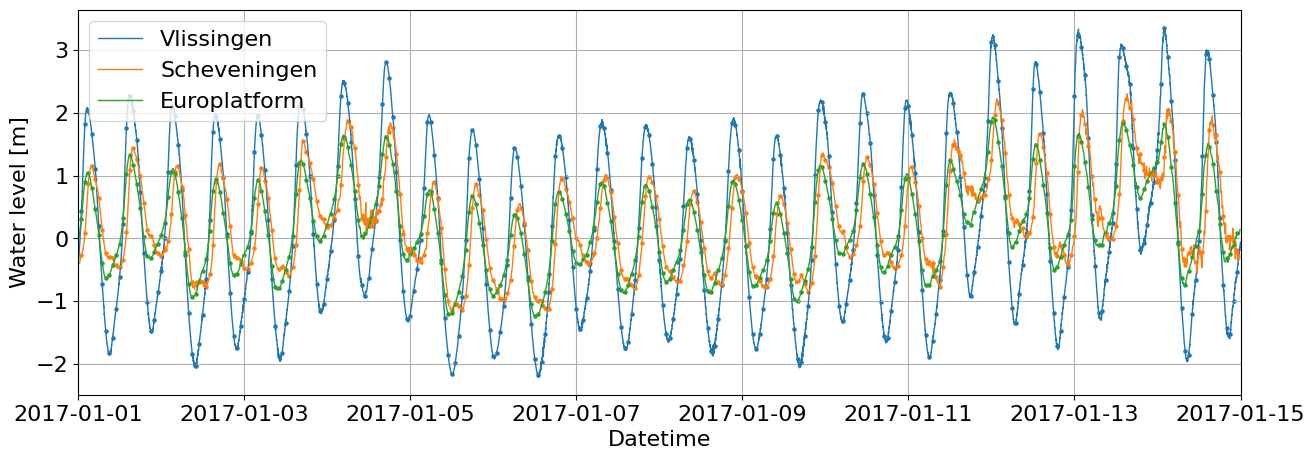

In [18]:
# plot source and data
daysource_vlis = vlis_data.source[(vlis_data.source.index > datetime(2017,1,1)) & (vlis_data.source.index < datetime(2017, 1, 15))]
daydata_vlis = vlis_data.hourly[(vlis_data.hourly.index > datetime(2017,1,1)) & (vlis_data.hourly.index < datetime(2017, 1, 15))]

daysource_schev = schev_data.source[(schev_data.source.index > datetime(2017,1,1)) & (schev_data.source.index < datetime(2017, 1, 15))]
daydata_schev = schev_data.hourly[(schev_data.hourly.index > datetime(2017,1,1)) & (schev_data.hourly.index < datetime(2017, 1, 15))]

daysource_eur = eur_data.source[(eur_data.source.index > datetime(2017,1,1)) & (eur_data.source.index < datetime(2017, 1, 15))]
daydata_eur = eur_data.hourly[(eur_data.hourly.index > datetime(2017,1,1)) & (eur_data.hourly.index < datetime(2017, 1, 15))]

s = 5
l = 1

plt.figure(figsize=(15, 5))
# Vlissingen
plt.scatter(daydata_vlis.index, daydata_vlis["values"], s=s)
plt.plot(daysource_vlis.index, daysource_vlis["values"], label='Vlissingen', linewidth=l)
# Scheveningen
plt.scatter(daydata_schev.index, daydata_schev["values"], s=s)
plt.plot(daysource_schev.index, daysource_schev["values"], label="Scheveningen", linewidth=l)
# Europlatform
plt.scatter(daydata_eur.index, daydata_eur["values"], s=s)
plt.plot(daysource_eur.index, daysource_eur["values"], label="Europlatform", linewidth=l)
plt.grid()
plt.legend(fontsize=16, loc=2)
plt.xlabel("Datetime", fontsize=16)
plt.ylabel("Water level [m]", fontsize=16)
plt.xlim(datetime(2017, 1, 1), datetime(2017, 1, 15))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

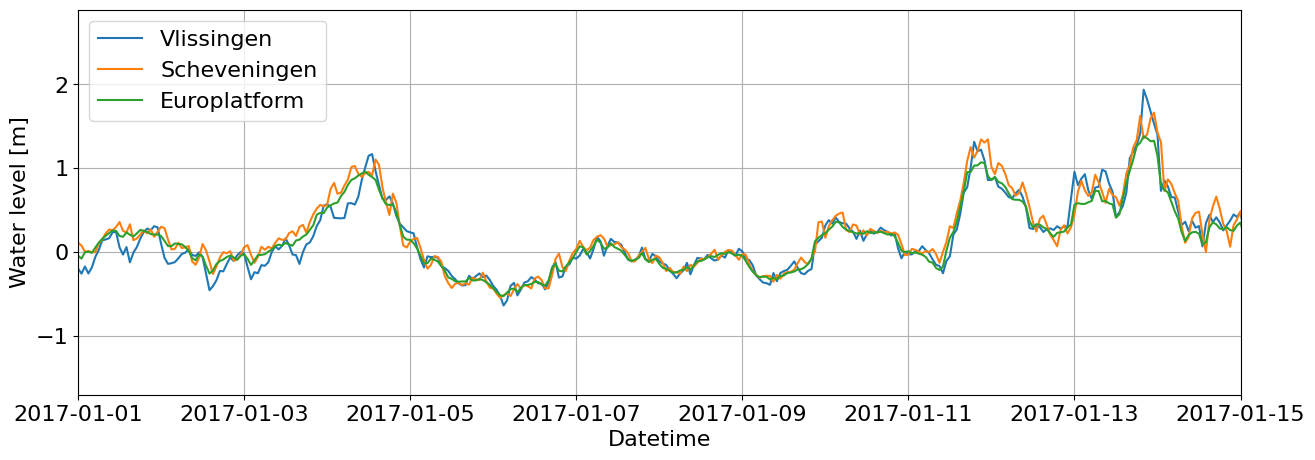

In [21]:
plt.figure(figsize=(15, 5))
# Vlissingen
# plt.scatter(daydata.index, daydata["values"])
plt.plot(vlis_data.detided.index, vlis_data.detided["resid"], label='Vlissingen')
# Scheveningen
# plt.scatter(daydata_schev.index, daydata_schev["values"])
plt.plot(schev_data.detided.index, schev_data.detided["resid"], label="Scheveningen")
# Europlatform
# plt.scatter(daydata_eur.index, daydata_eur["values"])
plt.plot(eur_data.detided.index, eur_data.detided["resid"], label="Europlatform")
plt.grid()
plt.legend(fontsize=16, loc=2)
plt.xlabel("Datetime", fontsize=16)
plt.ylabel("Water level [m]", fontsize=16)
plt.xlim(datetime(2017, 1, 1), datetime(2017, 1, 15))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [12]:
eur_data.detided

,SL,Tides,resid
datetime,,,
2001-06-30 23:00:00,0.34,0.319517,0.020483
2001-07-01 00:00:00,-0.01,-0.055706,0.045706
2001-07-01 01:00:00,-0.43,-0.488640,0.058640
2001-07-01 02:00:00,-0.76,-0.804824,0.044824
2001-07-01 03:00:00,-0.86,-0.879978,0.019978
...,...,...,...
2018-09-07 19:00:00,-0.35,-0.395080,0.045080
2018-09-07 20:00:00,-0.19,-0.195385,0.005385
2018-09-07 21:00:00,0.09,0.153355,-0.063355
